# 2.2.1 객체 지향 퍼셉트론 API

In [48]:
# 퍼셉트론 구현
import numpy as np

class Perceptron(object):
    """퍼셉트론 분류기
    
    매개 변수
    -------------------------------------
    eta : float
        학습률 (0.0과 1.0 사이)
    n_iter : int
        훈련 데이터셋 반복 횟수
    random_state : int
        가중치 무작위 초기화를 위한 난수 생성기 시드
        
    속성
    ------------------------
    w_ : 1d-array
        학습된 가중치
    errors_ : list
        에포크마다 누적된 분류 오류
    
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """훈련 데이터 학습
        
        매개 변수
        -----------
        X : {array-like}, shape = [n_samples, n_features]
            n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : {array-like}, shape = [n_samples]
            타깃 값
            
        
        반환 값
        -------------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환한다."""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# 2.2.2 붓꽃 데이터셋에서 퍼셉트론 훈련

In [49]:
# pandas 라이브러리를 사용하여 UCI 머신 러닝 저장소에서 붓꽃 데이터셋을 DataFrame 객체로 직접 로드(load)한다.
import pandas as pd
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                 header = None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


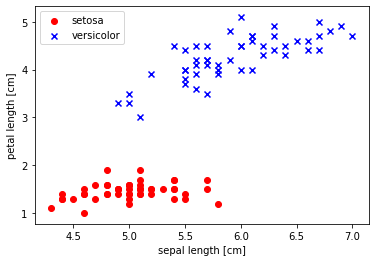

In [50]:
# 100개의 훈련 샘플에서 첫 번째 특성 열(꽃받침 길이)과 세 번째 특성 열(꽃임 길이)을 추출하여 특성 행렬 X에 저장한 다음,
# 2차원 산점도(scatter plot)로 시각화해 보자.
import matplotlib.pyplot as plt
import numpy as np

# setosa와 versicolor 를 선택한다.
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# 꽃받침 길이와 꽃잎 길이를 추출한다.
X = df.iloc[0:100, [0,2]].values

# 산점도를 그린다.
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

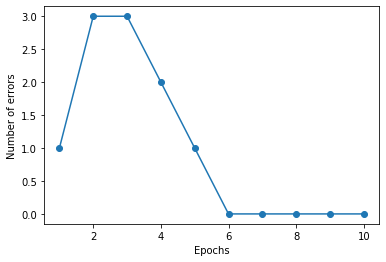

In [51]:
# 에포크 대비 잘못 분류된 오차를 그래프로 그려서, 알고리즘이 수렴하여 두 붓꽃 크래스를 구분하는 결정 경계를 찾는지 확인해보자.
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),
         ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.show()

In [52]:
# 2차원 데이터셋의 결정 경계를 시각화해보자.
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # 마커와 컬러맵을 설정한다.
    markers = ('s', 'x', 'o', '^', 'v')
    # s : 사각형, x : 곱셈기호, o : 원, ^ : 삼각형, v : 뒤집힌 삼각형
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계를 그린다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() - 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() - 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # 샘플의 산점도를 그린다.
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0],
                    y = X[y == cl, 1],
                    alpha = 0.8,
                    c = colors[idx],
                   marker = markers[idx],
                   label = cl,
                   edgecolor = 'black')

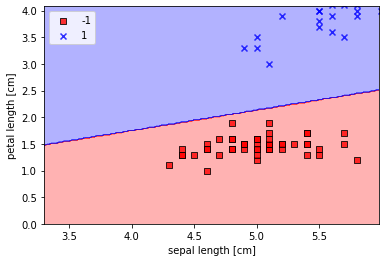

In [53]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()